In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('second.csv')

print(df)

        C1   C2       C3  C4   C5   C6  C7  C8  C12  C23  C24  C32  C33  \
0        0  udp  private  SF  105  146   0   0    0    1    1  255  254   
1        0  udp  private  SF  105  146   0   0    0    1    1  255  254   
2        0  udp  private  SF  105  146   0   0    0    1    1  255  254   
3        0  udp  private  SF  105  146   0   0    0    2    2  255  254   
4        0  udp  private  SF  105  146   0   0    0    2    2  255  254   
...     ..  ...      ...  ..  ...  ...  ..  ..  ...  ...  ...  ...  ...   
311024   0  udp  private  SF  105  147   0   0    0    2    2  255  255   
311025   0  udp  private  SF  105  147   0   0    0    4    4  255  255   
311026   0  udp  private  SF  105  147   0   0    0    2    2  255  255   
311027   0  udp  private  SF  105  147   0   0    0    4    4  255  255   
311028   0  udp  private  SF  105  147   0   0    0    2    2  255  255   

                   C42  
0              normal.  
1              normal.  
2              normal.  

In [3]:
print(df)

        C1   C2       C3  C4   C5   C6  C7  C8  C12  C23  C24  C32  C33  \
0        0  udp  private  SF  105  146   0   0    0    1    1  255  254   
1        0  udp  private  SF  105  146   0   0    0    1    1  255  254   
2        0  udp  private  SF  105  146   0   0    0    1    1  255  254   
3        0  udp  private  SF  105  146   0   0    0    2    2  255  254   
4        0  udp  private  SF  105  146   0   0    0    2    2  255  254   
...     ..  ...      ...  ..  ...  ...  ..  ..  ...  ...  ...  ...  ...   
311024   0  udp  private  SF  105  147   0   0    0    2    2  255  255   
311025   0  udp  private  SF  105  147   0   0    0    4    4  255  255   
311026   0  udp  private  SF  105  147   0   0    0    2    2  255  255   
311027   0  udp  private  SF  105  147   0   0    0    4    4  255  255   
311028   0  udp  private  SF  105  147   0   0    0    2    2  255  255   

                   C42  
0              normal.  
1              normal.  
2              normal.  

In [4]:
df.columns
feature_names = df.columns
feature_names = feature_names[:13]
print(feature_names)

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C12', 'C23', 'C24',
       'C32', 'C33'],
      dtype='object')


<AxesSubplot:>

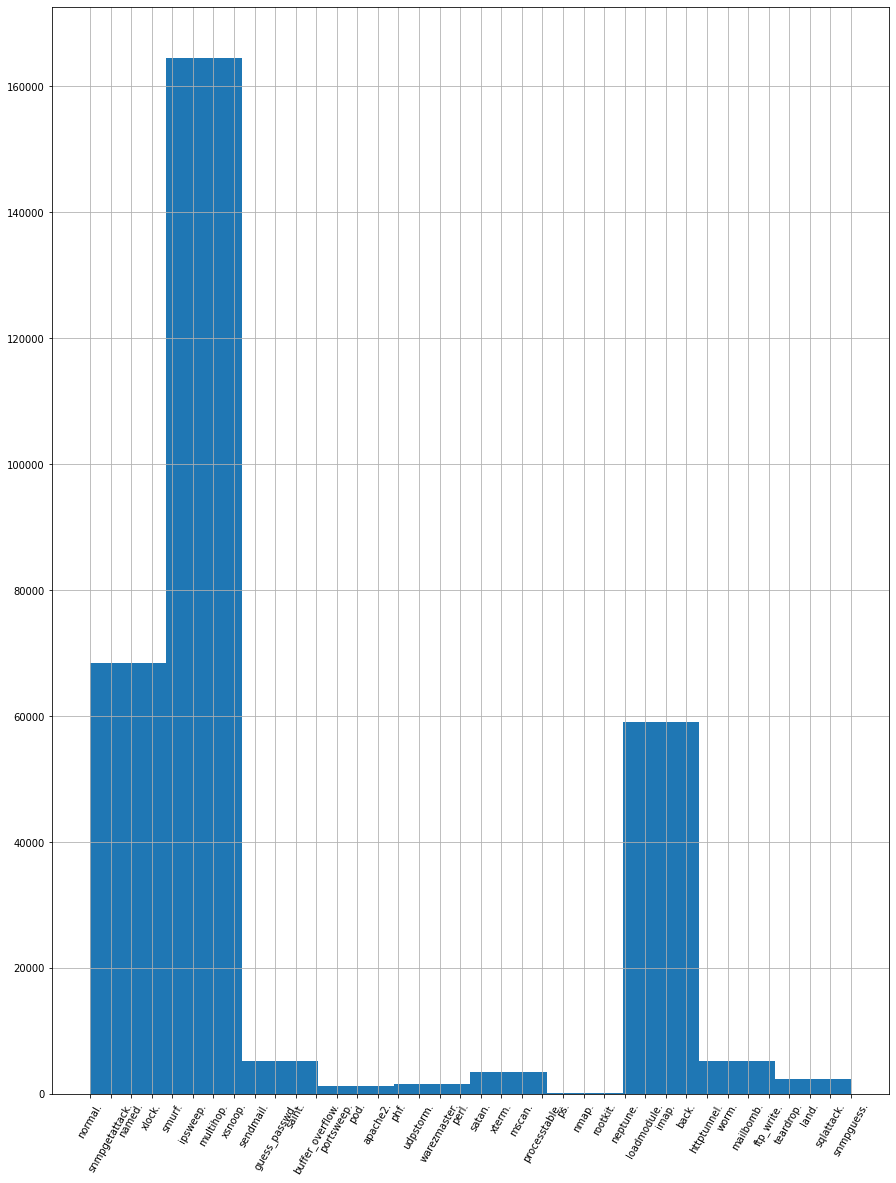

In [5]:
fig = plt.figure(figsize = (15,20))
plt.xticks(rotation = 60)
ax = fig.gca()
df['C42'].hist()

In [6]:
print(df['C42'].unique())



['normal.' 'snmpgetattack.' 'named.' 'xlock.' 'smurf.' 'ipsweep.'
 'multihop.' 'xsnoop.' 'sendmail.' 'guess_passwd.' 'saint.'
 'buffer_overflow.' 'portsweep.' 'pod.' 'apache2.' 'phf.' 'udpstorm.'
 'warezmaster.' 'perl.' 'satan.' 'xterm.' 'mscan.' 'processtable.' 'ps.'
 'nmap.' 'rootkit.' 'neptune.' 'loadmodule.' 'imap.' 'back.' 'httptunnel.'
 'worm.' 'mailbomb.' 'ftp_write.' 'teardrop.' 'land.' 'sqlattack.'
 'snmpguess.']


In [7]:
df=df[(df['C42']=='normal.') | (df['C42']=='smurf.') | (df['C42']=='snmpgetattack.') | (df['C42']=='udpstorm.') | (df['C42']=='neptune.')]
df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C12,C23,C24,C32,C33,C42
0,0,udp,private,SF,105,146,0,0,0,1,1,255,254,normal.
1,0,udp,private,SF,105,146,0,0,0,1,1,255,254,normal.
2,0,udp,private,SF,105,146,0,0,0,1,1,255,254,normal.
3,0,udp,private,SF,105,146,0,0,0,2,2,255,254,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,2,2,255,254,snmpgetattack.


<AxesSubplot:>

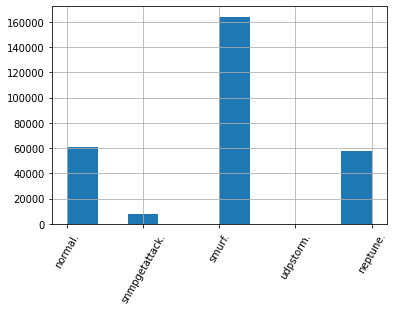

In [8]:
plt.xticks(rotation = 60)
df['C42'].hist()


In [9]:
16000/(16000+6000)
#results if the model does not train and guesses majority case

0.7272727272727273

In [10]:
data=df.values
data.shape

(290428, 14)

In [11]:
data[:,0]

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [12]:
#encoding data to be numerical values
le=[None]*14
for i in range(14):
    print(i,end=' | ')
    le[i] = LabelEncoder()
    le[i].fit(data[:,i])
    data[:,i]=le[i].transform(data[:,i])

0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 

In [13]:
print(data)
print(len(data))
print(data[1,13])
for i in range(len(data)):
    if data[i,13] != 1:
        data[i,13] = 2

[[0 2 45 ... 255 254 1]
 [0 2 45 ... 255 254 1]
 [0 2 45 ... 255 254 1]
 ...
 [0 2 45 ... 255 255 1]
 [0 2 45 ... 255 255 1]
 [0 2 45 ... 255 255 1]]
290428
1


In [14]:
data=data.astype('int')
print(data[:,1])
print(data)

[2 2 2 ... 2 2 2]
[[  0   2  45 ... 255 254   1]
 [  0   2  45 ... 255 254   1]
 [  0   2  45 ... 255 254   1]
 ...
 [  0   2  45 ... 255 255   1]
 [  0   2  45 ... 255 255   1]
 [  0   2  45 ... 255 255   1]]


In [15]:
#creating data both for training and testing
X_train,X_test,y_train,y_test=train_test_split(data[:,:13],data[:,13],test_size=0.2, random_state=42)

In [16]:
#training and testing the data
start = time.time()
t=tree.DecisionTreeClassifier()
t.fit(X_train,y_train)
train_time_Dtree = time.time() - start
res=t.predict(X_test)



In [17]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    t, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 0.889 seconds


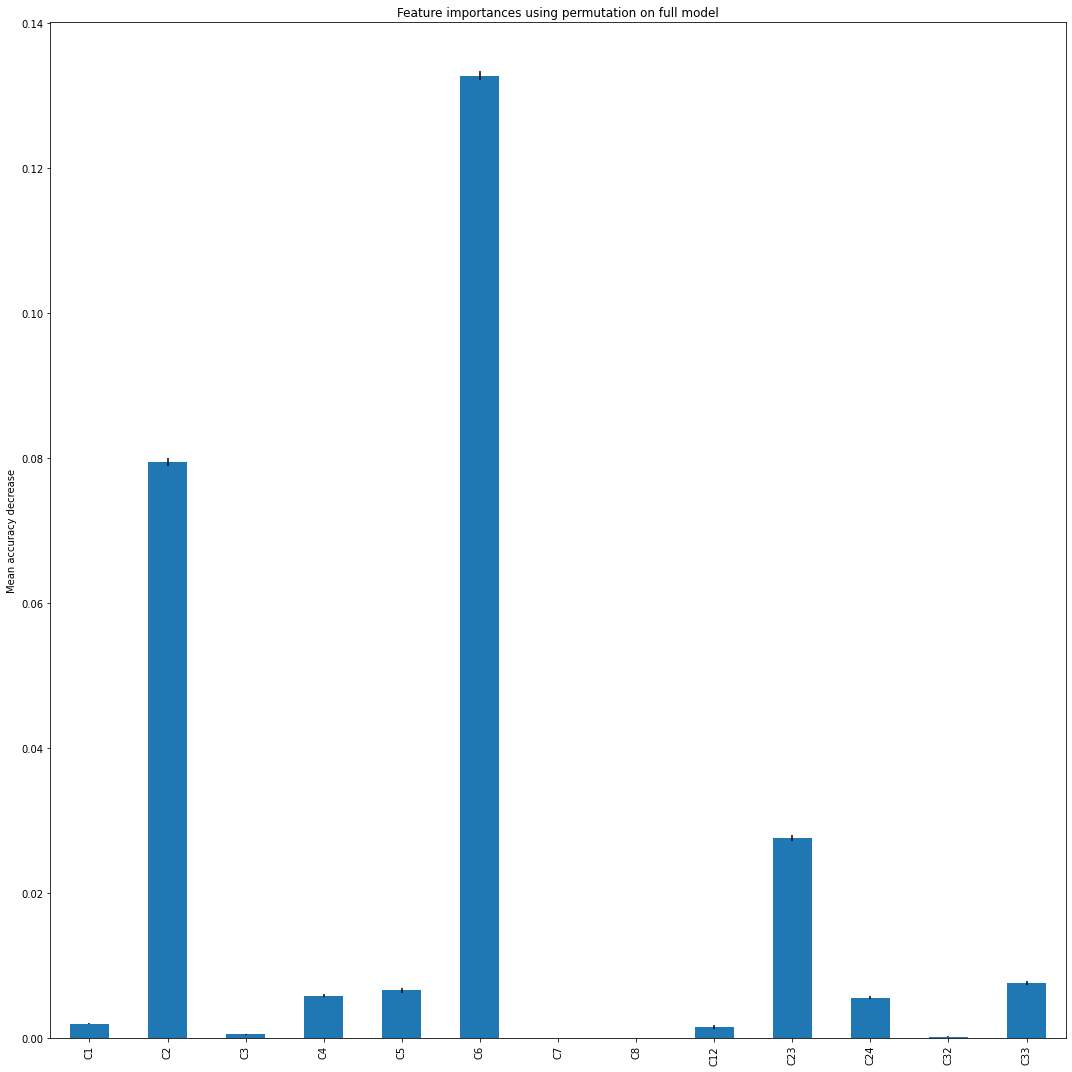

In [18]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [19]:
sum(res==y_test)/len(y_test)*100

97.95303515477052

In [20]:
res==y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [21]:
precision_score(res,y_test,average='micro')

0.9795303515477052

In [22]:
recall_score(res,y_test,average='micro')

0.9795303515477052

In [23]:
f1_score(res,y_test,average='micro')

0.9795303515477052

In [24]:
confusion_matrix(res, y_test)

array([[11385,   518],
       [  671, 45512]])

In [25]:
start = time.time()
clf = RandomForestClassifier(max_depth=100, random_state=10)
clf.fit(X_train, y_train)
train_time_RandomForest = time.time() - start

In [26]:
start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.007 seconds


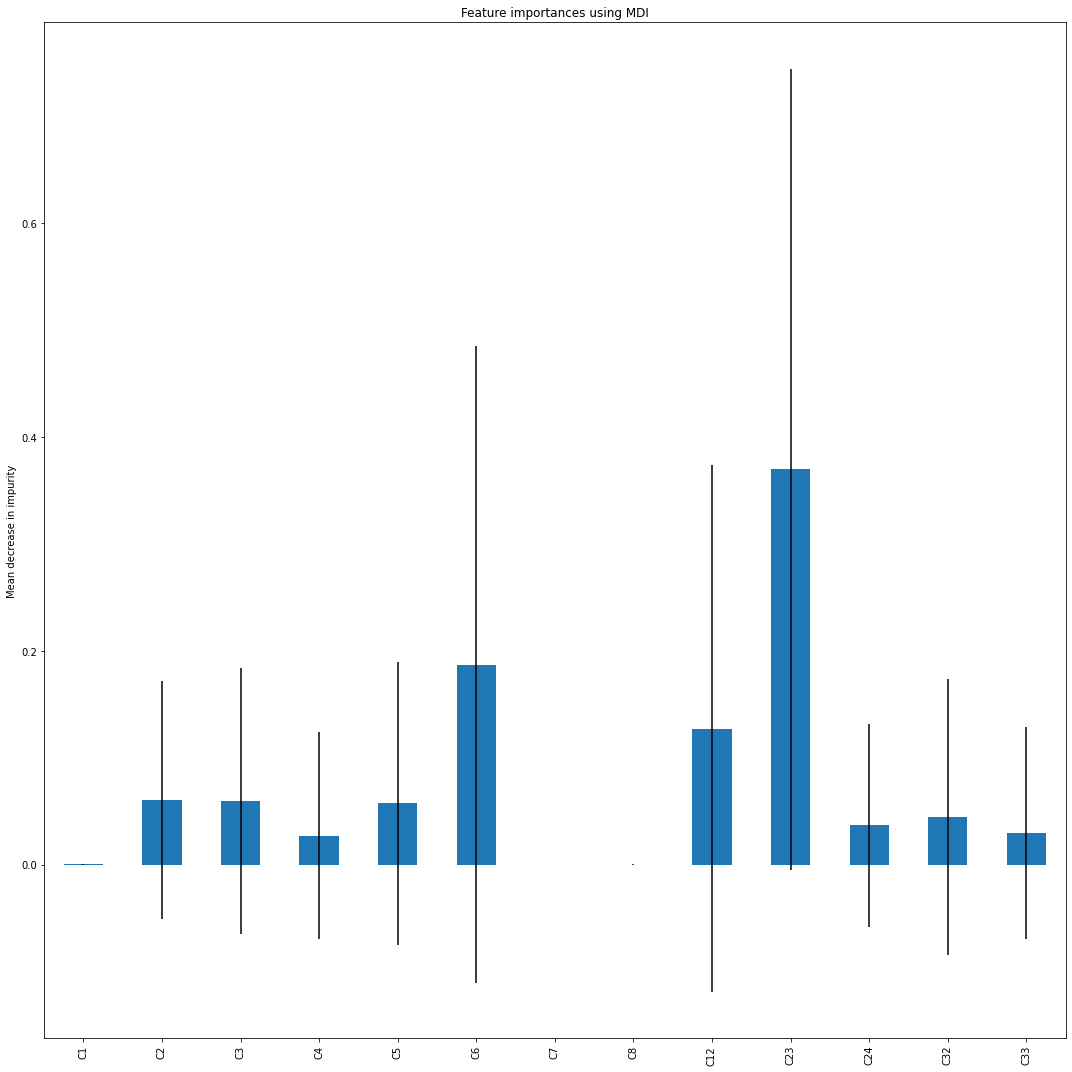

In [27]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(1,1,figsize=(15,15))
#fig = plt.figure(figsize = (15,20))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [28]:
start_time = time.time()
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 13.945 seconds


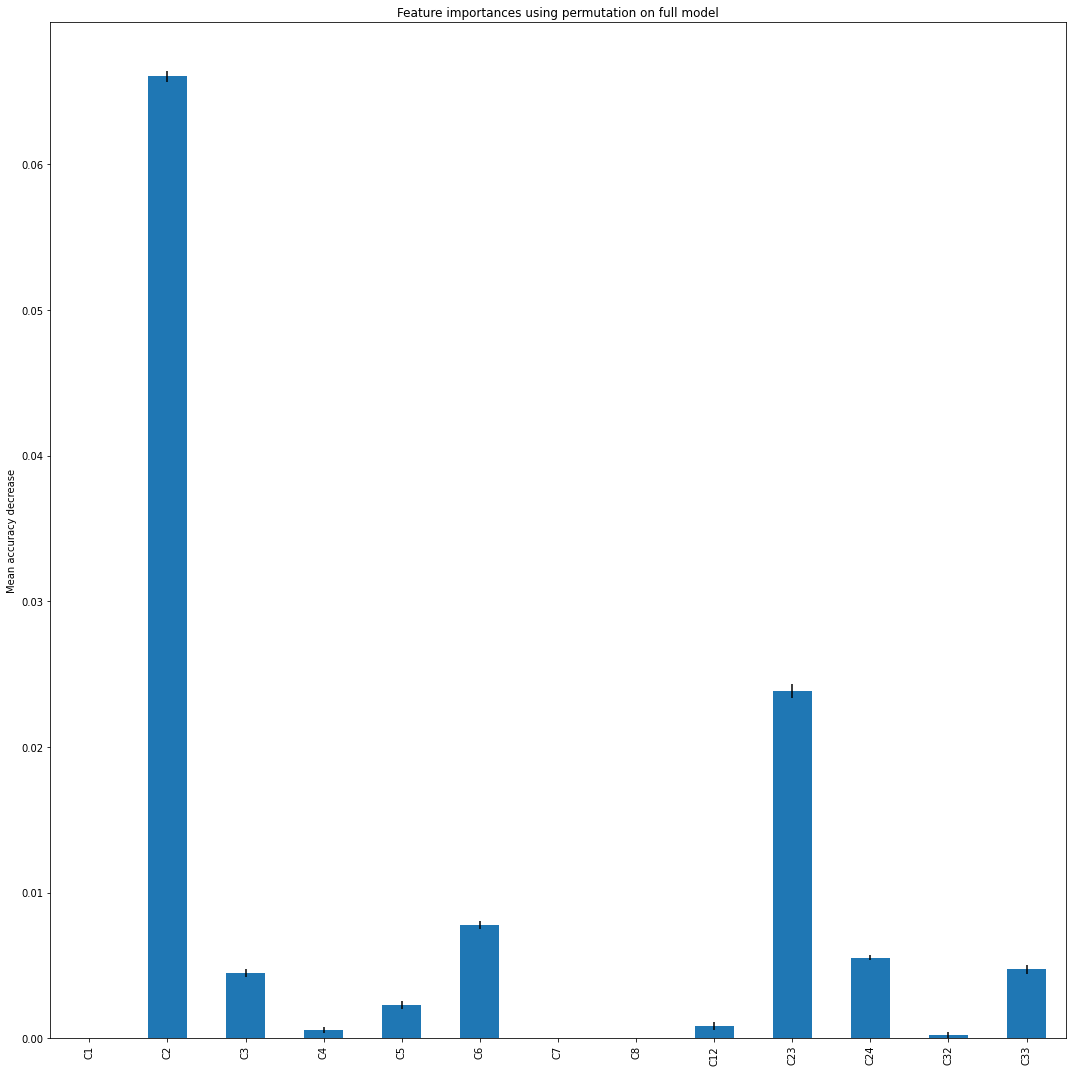

In [29]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [30]:
print("training times:")
print("Decision Tree: ",train_time_Dtree)
print("Random Forest: ",train_time_RandomForest)

training times:
Decision Tree:  0.13129425048828125
Random Forest:  4.824510335922241


In [31]:
res=clf.predict(X_test)

In [32]:
sum(res==y_test)/len(y_test)*100

97.94614881382778

In [33]:
precision_score(res,y_test,average='micro')

0.9794614881382777

In [34]:
recall_score(res,y_test,average='micro')

0.9794614881382777

In [35]:
f1_score(res,y_test,average='micro')

0.9794614881382777

In [36]:
confusion_matrix(res, y_test)

array([[11378,   515],
       [  678, 45515]])

In [39]:
start = time.time()
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
train_time_QDA = time.time() - start

start_time = time.time()
result = permutation_importance(
    qda, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

res=qda.predict(X_test)

print(sum(res==y_test)/len(y_test)*100)

print(precision_score(res,y_test,average='micro'))

print(recall_score(res,y_test,average='micro'))

print(f1_score(res,y_test,average='micro'))

confusion_matrix(res, y_test)
print(confusion_matrix(res,y_test))





print("training times:")
print("Decision Tree: ",train_time_Dtree)
print("Random Forest: ",train_time_RandomForest)
print("Quadratic Discriminant Analysis: ",train_time_QDA)

/home/crazyflie/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Elapsed time to compute the importances: 1.859 seconds
91.67097062975587
0.9167097062975588
0.9167097062975588
0.9167097062975588
[[11896  4678]
 [  160 41352]]
training times:
Decision Tree:  0.13129425048828125
Random Forest:  4.824510335922241
Quadratic Discriminant Analysis:  0.0945742130279541


In [40]:
start_time = time.time()
result = permutation_importance(
    qda, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 2.278 seconds


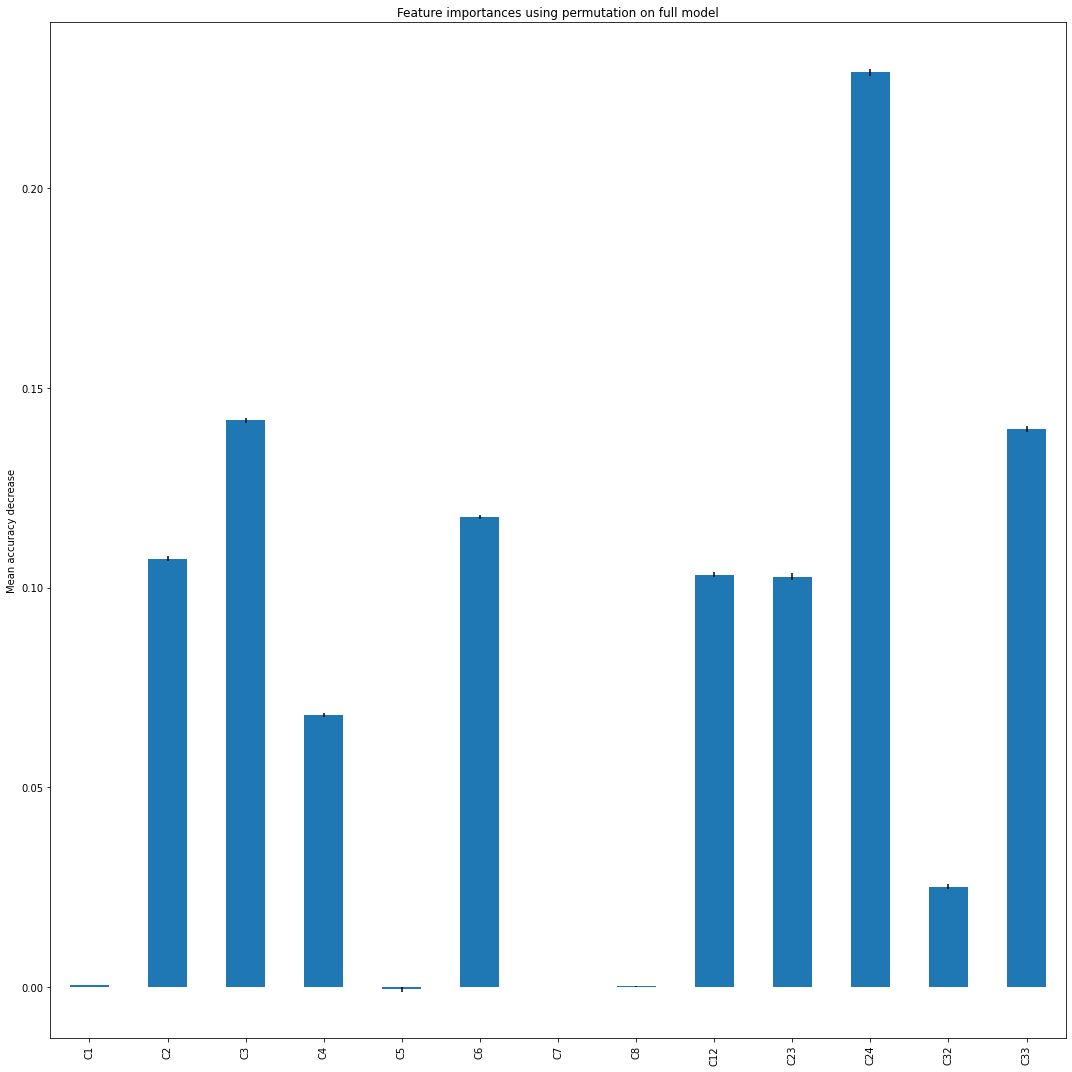

In [42]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()